In [1]:
ls


drive/  pedestrian.jpg  sample_data/


In [2]:
cd drive/MyDrive/yolo

/content/drive/MyDrive/yolo


In [3]:
ls

coco.names  image.jpg  yolov4.cfg  yolov4.weights


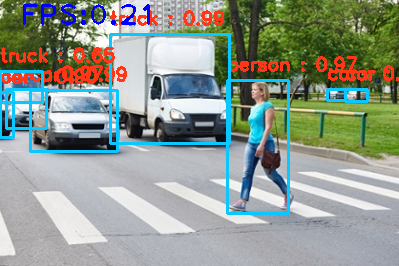

In [4]:
import cv2
import time
import numpy as np
from google.colab.patches import cv2_imshow

confidence = 0.6  #only boundary boxes more than 0,6 r shown
Nms= 0.3
class_names = []
with open("coco.names", "r") as f:
  class_names = [cname.strip() for cname in f.readlines()]
img = cv2.imread("/content/pedestrian.jpg")  #reads img
arc = cv2.dnn.readNet("yolov4.weights","yolov4.cfg")      #dnn , loaded weigths
arc.setPreferableBackend(cv2.dnn.DNN_BACKEND_CUDA) #
arc.setPreferableTarget(cv2.dnn.DNN_TARGET_CUDA_FP16)
model = cv2.dnn_DetectionModel(arc)
model.setInputParams(size=(640,640), scale=1/255, swapRB=True)
x =time.time()
classes, scores, boxes = model.detect(img, confidence, Nms)
y= time.time()
fps=1/(y-x)
for (classid, score, box) in zip(classes, scores, boxes):
  if isinstance(classid, (list, np.ndarray)):
    classid_value = classid[0]
  else:
    classid_value = classid
# Check if score is a list or a scalar
  if isinstance(score, (list, np.ndarray)):
    score_value = score[0]
  else:
    score_value = score
    label = "%s : %.2f" % (class_names[classid_value], score_value)
    cv2.rectangle(img,box,color=(255, 200, 10),thickness=2)
    cv2.putText(img, label, (box[0],box[1]-10),cv2.FONT_HERSHEY_SIMPLEX,0.6,(25,55,255),2)
    cv2.putText(img, "FPS:{0:.2f}".format(fps),(20, 25), cv2.FONT_HERSHEY_PLAIN,fontScale=2,color=(255, 0, 0),thickness=2)
cv2_imshow(img)

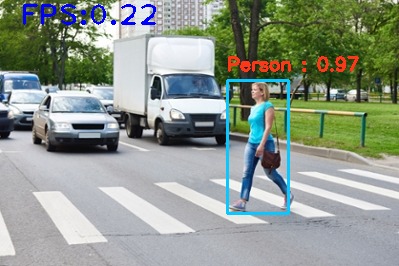

In [6]:
import cv2
import time
import numpy as np
from google.colab.patches import cv2_imshow

confidence = 0.6
Nms = 0.3

img = cv2.imread("/content/pedestrian.jpg")
arc = cv2.dnn.readNet("yolov4.weights", "yolov4.cfg")
arc.setPreferableBackend(cv2.dnn.DNN_BACKEND_CUDA)
arc.setPreferableTarget(cv2.dnn.DNN_TARGET_CUDA_FP16)
model = cv2.dnn_DetectionModel(arc)
model.setInputParams(size=(640, 640), scale=1/255, swapRB=True)
x = time.time()
classes, scores, boxes = model.detect(img, confidence, Nms)
y = time.time()
fps = 1 / (y - x)

for (classid, score, box) in zip(classes, scores, boxes):
    if classid == 0:  # Filter only 'person' class (class id 0)
        label = "Person : %.2f" % score
        cv2.rectangle(img, box, color=(255, 200, 10), thickness=2)
        cv2.putText(img, label, (box[0], box[1] - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (25, 55, 255), 2)
        cv2.putText(img, "FPS:{0:.2f}".format(fps), (20, 25), cv2.FONT_HERSHEY_PLAIN, fontScale=2, color=(255, 0, 0), thickness=2)

cv2_imshow(img)


In [ ]:
confidence = 0.6
Nms= 0.3
class_names = []
with open("coco.names", "r") as f:
  class_names = [cname.strip() for cname in f.readlines()]

In [ ]:
img = cv2.imread("image.jpg")
arc = cv2.dnn.readNet("yolov4.weights","yolov4.cfg")
arc.setPreferableBackend(cv2.dnn.DNN_BACKEND_CUDA)
arc.setPreferableTarget(cv2.dnn.DNN_TARGET_CUDA_FP16)
model = cv2.dnn_DetectionModel(arc)
model.setInputParams(size=(640,640), scale=1/255, swapRB=True)
x =time.time()
classes, scores, boxes = model.detect(img, confidence, Nms)
y= time.time()
fps=1/(y-x)

In [ ]:
for (classid, score, box) in zip(classes, scores, boxes):
# Check if score is a list or a scalar
  if isinstance(score, (list, np.ndarray)):
    score_value = score[0]
  else:
    score_value = score
    label = "%s : %.2f" % (class_names[classid_value], score_value)
    cv2.rectangle(img,box,color=(255, 200, 10),thickness=2)
    cv2.putText(img, label, (box[0],box[1]-10),cv2.FONT_HERSHEY_SIMPLEX,0.6,(25,55,255),2)
    cv2.putText(img, "FPS:{0:.2f}".format(fps),(20, 25), cv2.FONT_HERSHEY_PLAIN,fontScale=2,color=(255, 0, 0),thickness=2)
cv2_imshow(img)